# CS4035 - Cyber Data Analytics
## Lab 1 - Fraud data

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 1 contains 5 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

## Group Number :

## Student 1 
### Name : Joost Bambacht
### ID : 4025016

## Student 2
### Name :
### ID :

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

1. pip3 install -r requirements.txt
2. Place "data_for_student_case.csv" in the same folder
3. Run code fragment below once to initialize the classes and dataset
4. Run the code fragment for each task separately

In [31]:
%load_ext autoreload
%autoreload 2

import visualisation as visual
import imbalanced as imb
import classification as classify
from sklearn.model_selection import KFold, StratifiedKFold 
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

data = imb.load_data("data_for_student_case.csv")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Visualization task – 1 A4

### 1a. Plot visulations 

Figure 1,2: Heatmaps 'Currency code' vs 'Card type used' (all transactions vs fraud transactions)


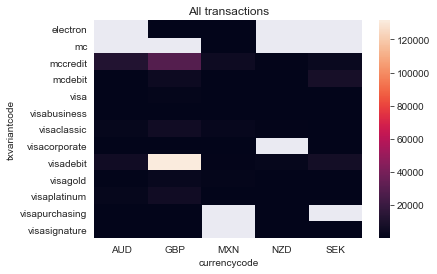

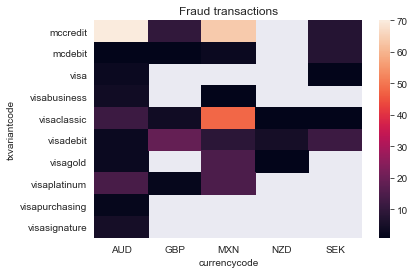

In [29]:
# Obtain and process data
pdata = visual.pre_process(data)
pdata_fraud = visual.get_fraud_data(pdata)
pdata_nonfraud = visual.get_nonfraud_data(pdata)

print("Figure 1,2: Heatmaps 'Currency code' vs 'Card type used' (all transactions vs fraud transactions)")
visual.get_heatmap(pdata,pdata_fraud, "txvariantcode","currencycode")

### 1b. Describe the visualizations and provide relavant explanations of features and relations.

First, we briefly discuss some general findings. Then, the results of the figure are explained in more detail. At first we thought that the features containing ids would be valuable to use, but after reviewing the numbers we concluded that not a lot could be done with it rather than adding them to the blacklist. 
For the shopperinteraction feature we find that the number of cases of Ecommerce and ContAuth are somewhat the same in each class. However, the number of occurrences of Ecommerce is close to 100% while almost all of the remaining transactions are of the ContAuth specification. 
The card types used clearly indicate that non-fraud transactions are done mostly by a visa debit card, while the mccredit card is used most for fraud cases. We can, therefore, conclude that if a mccredit card is used, the probability of being fraud is higher than other cards.
Looking at the countries and currencies we find that the non-fraudulent transactions are done most in Great Britain (with currency GBP). For the fraud cases, most transactions are submitted from Mexico (with currency MXN) and Australia (with currency AUD). 
From all transactions in which a CVC code was supplied, almost all responses match the correct response in the non-fraudulent cases and a very small number for the fraud cases (these cards are probably hacked because the CVC is known). If the response is unknown, the transaction is most likely to be fraudulent. 

In Figures 1 and 2 the relation between the currency used and card type used has been created in heatmaps. For the first heatmap all (pre-processed) data has been used, while the second heatmap only considers the fraudulent transactions. This heatmap not only shows that the GBP is the most used currency, determined over all transactions, but additionally shows which card types are used in combination with that currency, which in case of the GBP clearly is the visadebit card. The heatmap for all transactions furthermore does not include a lot of insights. If we look at the heatmap for only the fraud transactions we get a totally different view, which is not only due to the lower number of transactions available. We see that the mccredit card in combination with the AUD and MXN as currency are clearly used most and that the MXN is also used often in combination with a visaclassic card. This means that these combinations of cards and currencies may be considered with a higher weight in fraud detection. It is also worth mentioning that the GBP in combination with a visadebit is used no more than average, meaning that GBP in combination with a visadebit card needs other measures (features) to be distinguished correctly from a benign transaction.

## 2. Imbalance task – 1 A4 – Individual

### 2a. Print ROC curves

Total: 237036
Non-Fraud: 236691 = 99.8545%
Fraud: 345 = 0.1455%

LogisticRegression UNSMOTEd:
Accuracy: 0.9983968724951132
Precision: 0.0
Recall: 0.0
F1: 0.0

LogisticRegression SMOTEd:
Accuracy: 0.9983968724951132
Precision: 0.0
Recall: 0.0
F1: 0.0



/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


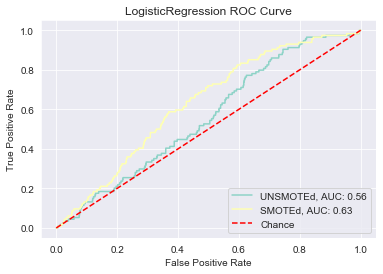

In [35]:
pdata = imb.pre_process(data)
imb.describe_data(pdata)

# Get feature vector and truth vector from dataset
X, y = imb.get_X_y(pdata)

# Classifiers to include.
classifiers = ["LogisticRegression"]

# For each classifier we classify the UNSMOTEd and SMOTEd dataset, display performances, 
# and plot results of both UNSMOTEd and SMOTEd
for clf in classifiers:
    clf_UNSMOTEd, predicted_UNSMOTEd, predicted_proba_UNSMOTEd, y_test_UNSMOTEd = imb.classify(clf, X, y, 0)
    clf_SMOTEd, predicted_SMOTEd, predicted_proba_SMOTEd, y_test_SMOTEd = imb.classify(clf, X, y, 25)
    
    imb.get_performance(clf_UNSMOTEd, predicted_UNSMOTEd, y_test_UNSMOTEd, clf+" UNSMOTEd")
    imb.get_performance(clf_SMOTEd, predicted_SMOTEd, y_test_SMOTEd, clf+" SMOTEd")
    
    imb.plot_roc(y_test_UNSMOTEd, predicted_proba_UNSMOTEd, y_test_SMOTEd, predicted_proba_SMOTEd, clf, True)

### 2b. Analyse the performance of the classifiers. Explain which method performs best.

As can be seen above, the fraud transactions are in an extremely minority compared to the benign transactions. The classifier would not be able to correctly classify (detect) a lot of the fraud transactions because there are not enough samples to learn from (undersampling). To increase the number of samples from the minority class, we can apply SMOTE, which create new samples using the current samples by calculating the k nearest neighbors. It then creates new points based on a number of random nearest neighbors. For this exercise the fraud dataset is 6 times its original size.

The following three classifiers has been chosen to see if SMOTE is effective: kNN, Logistic Regression, Random Forest. If we apply SMOTE to the complete dataset, there is a chance that a synthetic sample exists in the testing set, which influences the results. The test set should only consists of real instances because otherwise it may be biased. After applying SMOTE to the dataset, it is expected that we see a decrease in accuracy for each model since the class distributions changed in favor of the minority class. The accuracy is in these cases not important since we can achieve a high accuracy by simply classifying each sample to the majority class (99.85%). In these situations the precision and recall are metrics that can be used. The precision determines the number of correctly predicted instances of the truth class compared to the total number of positively predicted instances. The recall is the fraction of the correctly predicted relevant instances compared to the total number of relevant instances. The ideal situation includes both a high precision and recall. 

Before turning to the ROC curve the explanation of the True Positive Rate and False Positive Rate must be explained. The TPR is the ratio of the true positives that are correctly predicted to the truth class. The FPR is the ratio of the untrue instances that are wrongly predicted to the truth class. The relation between both can best be explained wiht an example: if we have a value for the TPR, say 0.10, it means that every time we have a positive instance the probability of being right is 0.10 (TPR) and 0.90 of being wrong (FPR). The optimal values for the TPR and FPR are logically defined to be 1.0 and 0.0. The further the ROC Curve will go into the direction of the top left corner, the higher the area under curve and the better the performance is.

If we now take a look at the ROC curve plots we can also see some differences in performance. When applying SMOTE to the kNN classifier the true positive rate increases by quite some margin while there's almost no increase of the false positive rate. This change in TPR and FPR results in an increase of about 25% in the area under curve. The precision and recall on the other hand are not both increasing. The precision is somewhat unchanged and low while the recall is increased marginally. The second classifier is the Logistic Regression. The weird shape of the UNSMOTEd dataset, including the value of the area under curve, directly attracts the attention. The classifier performs even worse than a classifier that bases its outcome on a random coin toss. After applying SMOTE we see a clear improvement for the ROC curve and the area under the curve (about 40%). If we look at the precision and recall we see again that the precision is somewhat the same value while the recall slightly improves. The last classifier we discuss is the RandomForest classifier. Although the performance of the classifier without the use of SMOTE already had a good ROC curve and AUC, using SMOTE did (slightly) increase these metrics even further. The precision and recall on the other hand are looking strange. The UNSMOTEd dataset caused the precision and recall to be 1.0 and +- 0.0, while applying SMOTE the precision dropped about 80%. We might take the precision of 1.0 in consideration since it is hard to achieve this kind of values in an exteremly unbalanced dataset. The recall on the other hand follows the same trend as the other classifiers.

From the results (ROC curve, AUC, precision and recall) we must conclude that the overall performance obtained for the RandomForest classifier is best. However, the performance increase (when using SMOTE) of the RandomForest classifier is not leading since both the KNN and Logistic Regression classifier achieved more gain. Applying SMOTE achieves the best performance increase for the kNN classifier if we also take the precision and recall into account.

### 2c. Is using SMOTE a good idea? Why (not)?

If we look at the classifiers used for analysing the performance we must conclude that the use of SMOTE is a good idea since it does increase the precision and recall (measured together in the F1 score), auc, and ROC curve. Every classifier (and probably also different sort of data) does react differently on SMOTE, thus choice for applying SMOTE its effect must be analysed on beforehand. 

## 3. Privacy task – 1 A4 – Individual

### 3a. Print ROC curves

### 3b. Analyse the performance of the classifiers. Explain which method performs best.

As can be seen in the two figures above, six different classification methods are used to classify the data.
Firstly, a sample of the whole data set is taken of approximately 50k records. To analyze the influence of the rank-swap method two data sets are compared. The first data set, ‘sampledData.csv’, only contains the sampled records, and the other data set ‘shuffledData.csv', contains the data on which the rank-swap algorithm is applied to protect the privacy of the data. The variable p used in the rank-swap algorithm is set to 10, to only switch values really close to each other.
Furthermore, k-Cross-validation is used to generate test and training sets, where k is set to six to solve the classification problem within a feasible time. The training data is resampled using the built-in SMOTE function of the imblearn package.
In the plots above, the average ROC of the six different classification methods is plotted. From the figure, it can be seen that the k-nearest neighbor algorithm performs worst. The random forest classifier is able to classify the data the best and the ideal situation is reached. The performance of the other four methods are comparable, where logistic regression performs slightly better than the other three implemented methods. The performance of the different classifiers is further analyzed in the next section.


### 3c. Can you explain the performance difference for the different classifiers? Is it advisable to protect people’s privacy using rank-swapping? Why (not)?

As defined in the documentation of SKlearn, the random forest classifier fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. This method already avoids overfitting by itself, this is of course not the case when you use, for example, KNN, where you need to define the hyperparameters yourself. Probably, the hyperparameters used for KNN are not optimal and preforms, therefore, the worst. The hyperparameters play a huge role in the performance of machine learning algorithms, so to check which algorithms perform best a detailed analysis must be done using several hyperparameters.
 
Comparing the performance of the classifiers on both datasets concluded could be that using the Rank-Swapping algorithm has minimal impact on the final result. This can be seen in the figures were the difference between the average ROC of each classifier is minimal. Therefore this technique can easily be used to protect the privacy of the data without having an influence on the final result.
However, when very similar data is used where the number of different values per attribute is small, this method is not very useful. The reason for this is that you are swapping the same values over and over again. An example of this is the ‘shopperinteraction’ column which contains only three categories(Ecommerce, ContAuth, and POS). Performing the rank-swap algorithm on this column has minimal impact when using a small p-value. The columns that contain much more privacy-related content, for example, ip_id or card_id, where the values vary a lot, a small p-value could be used to protect the privacy of the data. Therefore, concluded could be that rank-swapping is an effective method to protect people’s privacy because features that contain a lot of privacy-related data often differ a lot.


## 4. Classification task – 2 A4

### 4a. Print relevant plots and metrics with clear headings.

Total: 237036
Non-Fraud: 236691 = 99.8545%
Fraud: 345 = 0.1455%

Decision-Tree Classifier (White-box):
--> True Positives: 109
--> False Positives: 1549
Random-Forest Classifier (Black-box):
--> True Positives: 70
--> False Positives: 668
Figure 1,2: Bar plots of feature importances of both algorithms


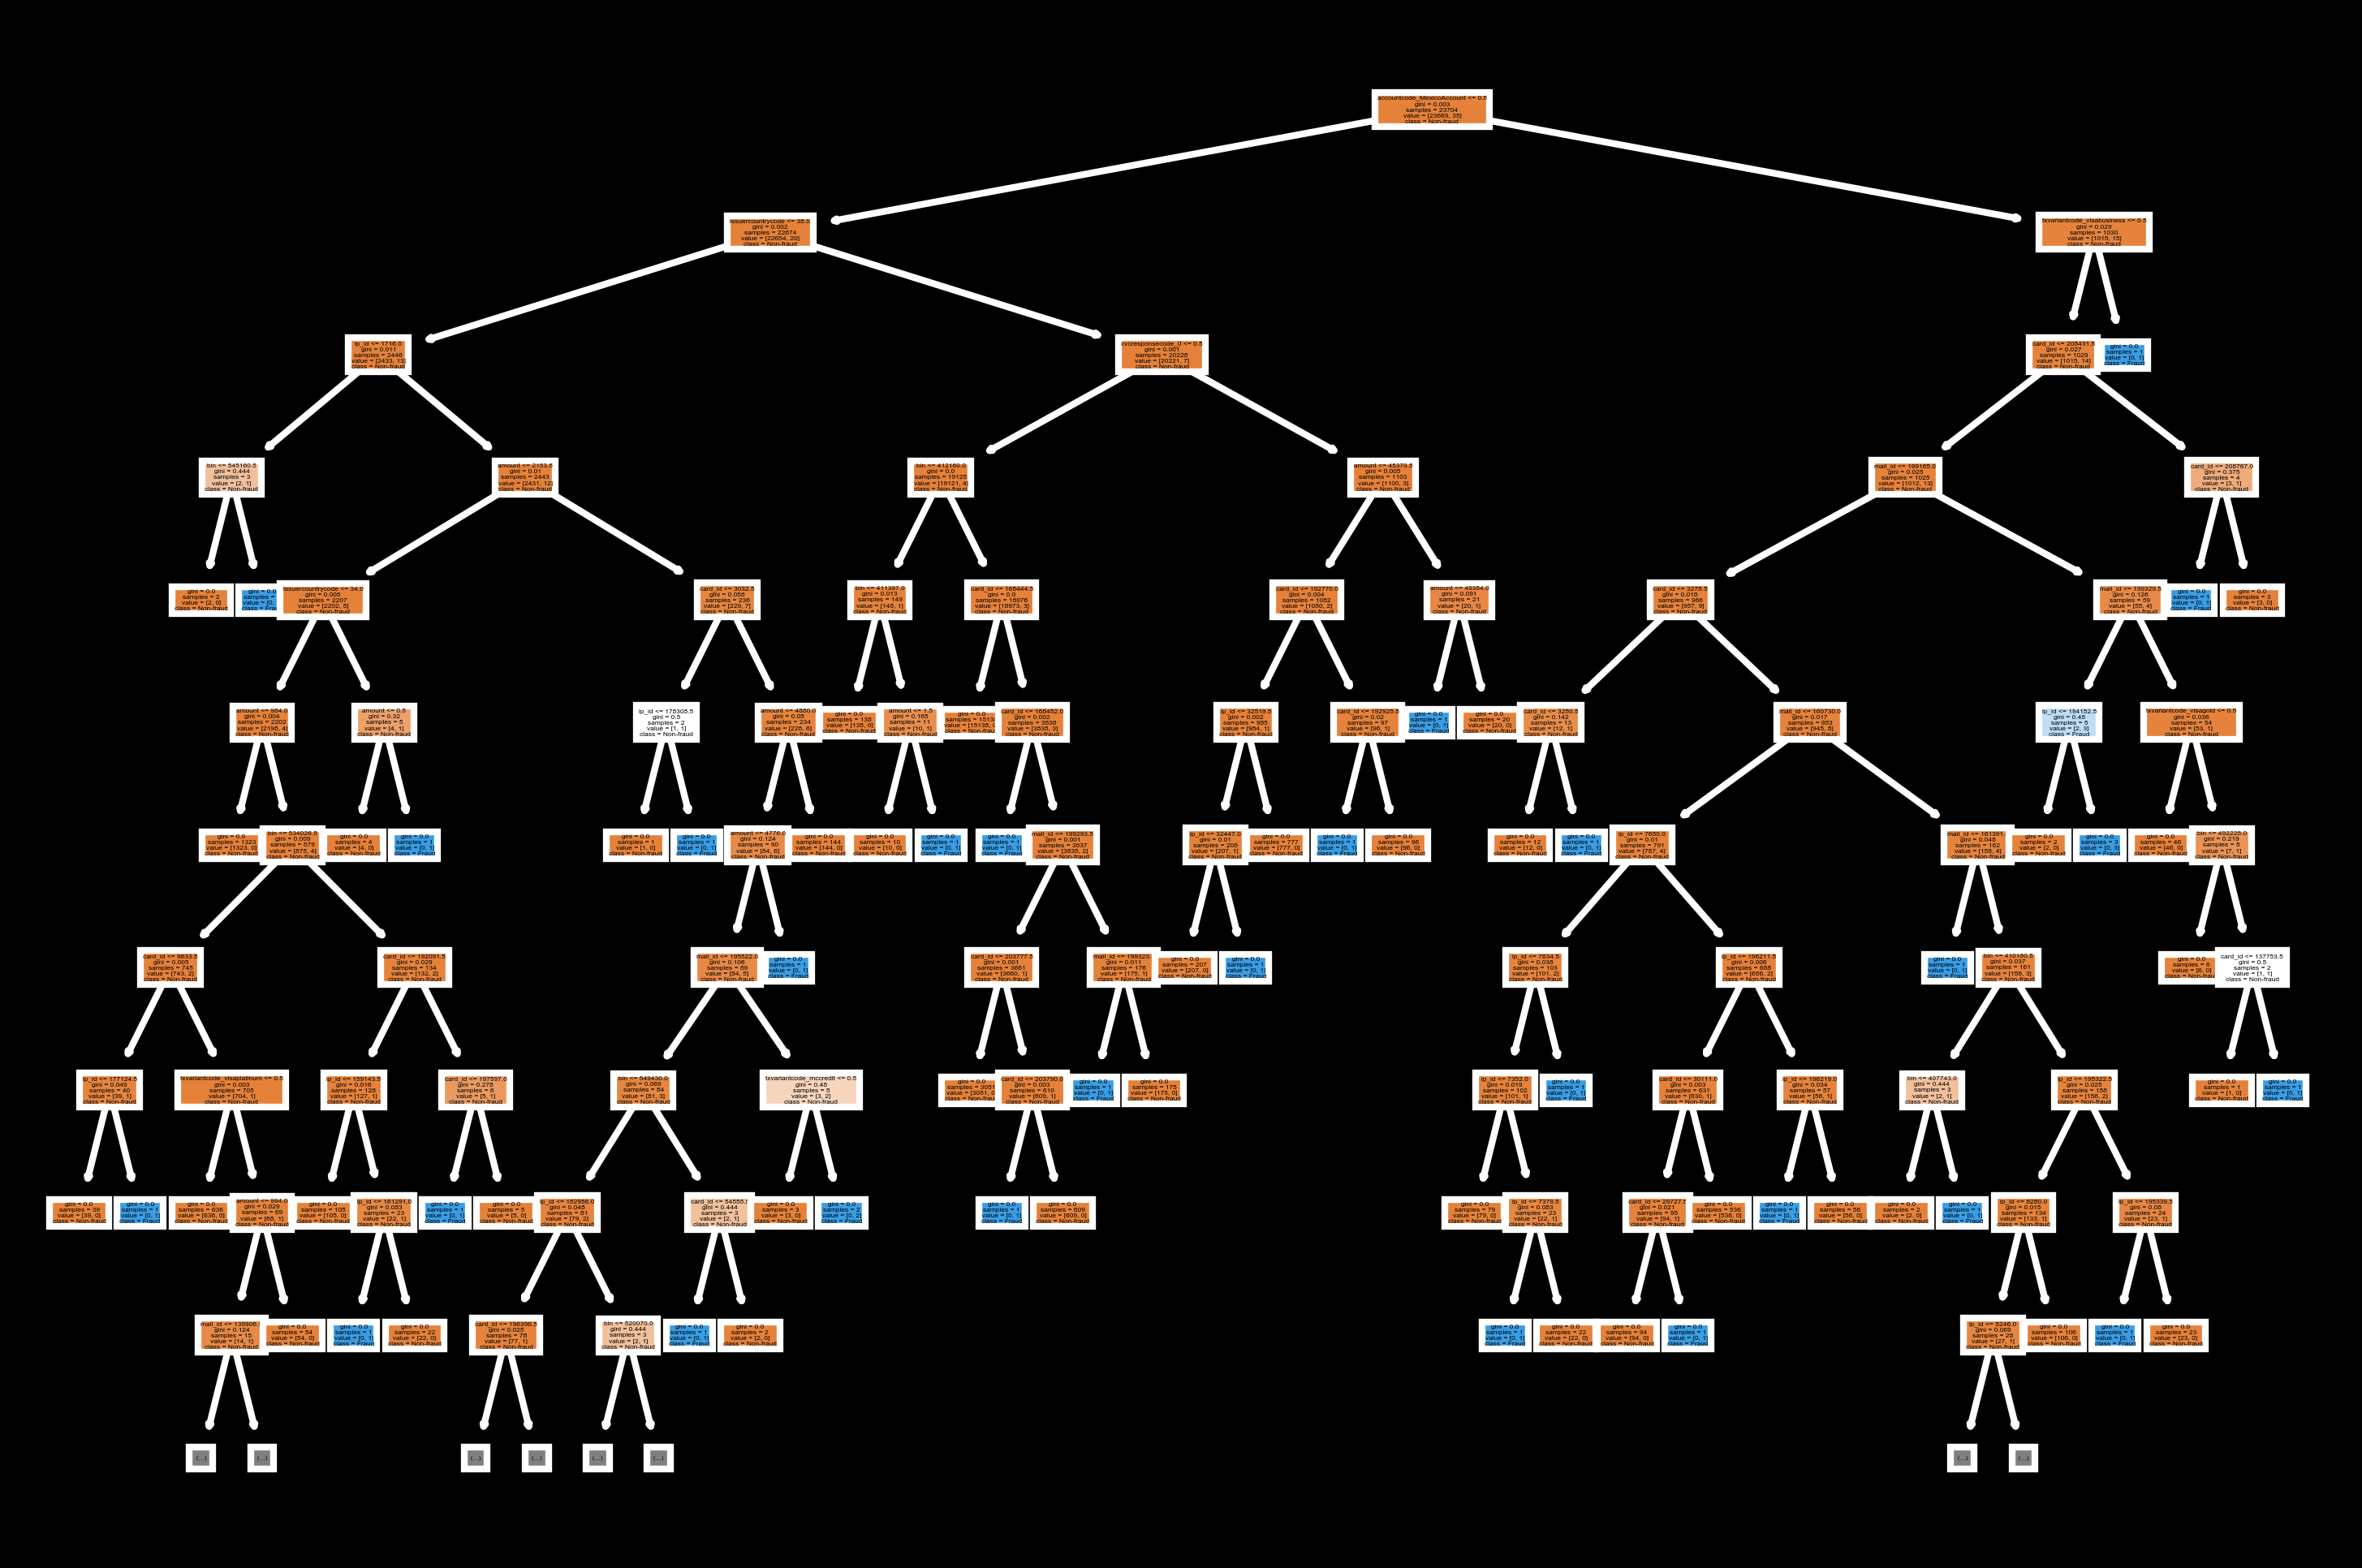

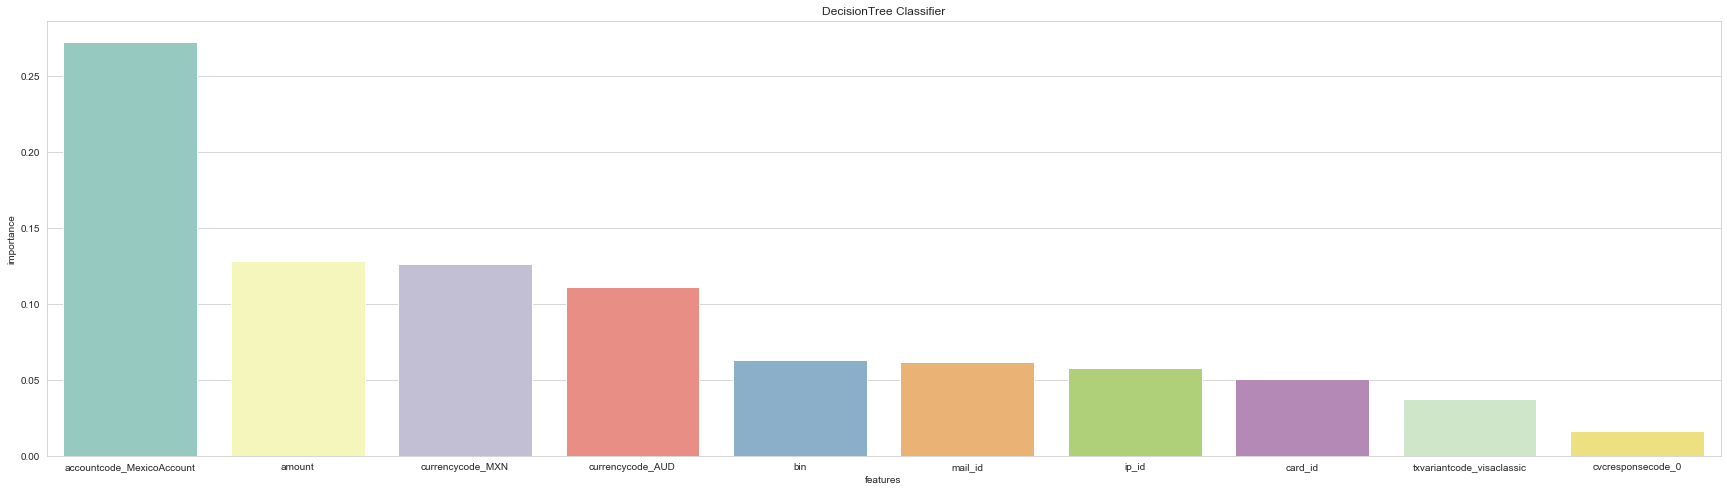

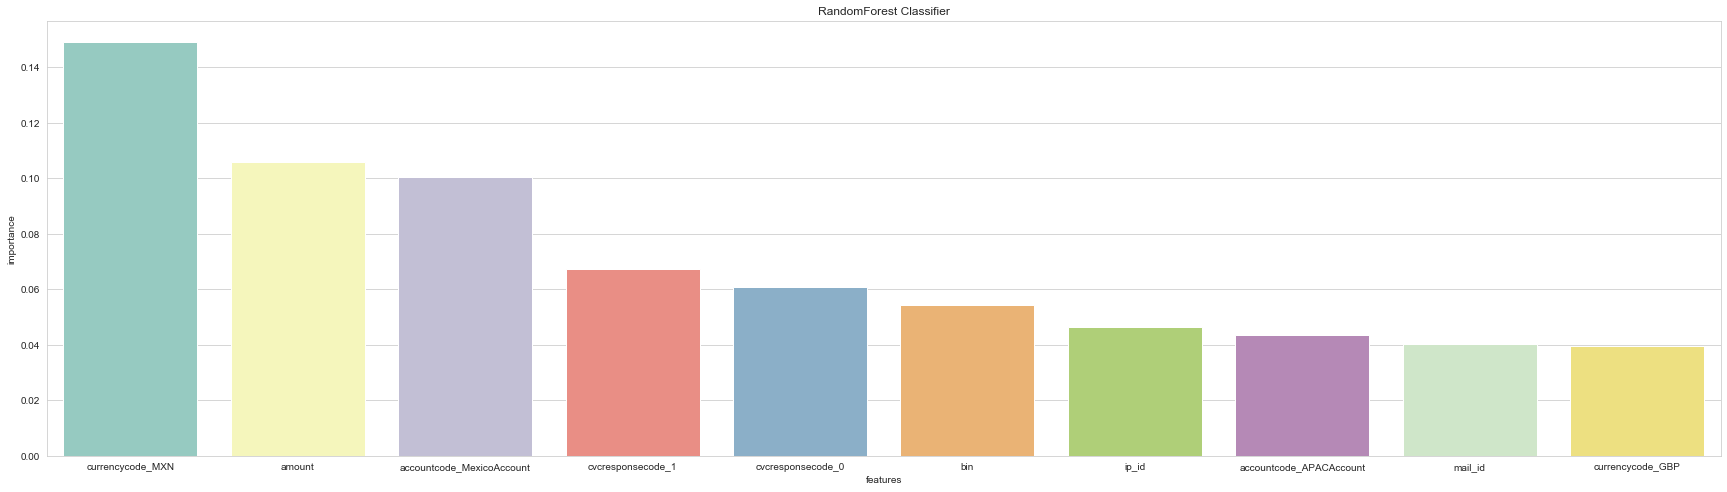

In [17]:
pdata = classify.pre_process(data)
classify.describe_data(pdata)

random_state=13
under_sampling_rate=0.0045
over_sampling_rate=0.125
splits = 10
print_tree_first_iteration = True
print_iterations = False

# Get feature vector and truth vector from dataset
X, y = classify.get_X_y(pdata)

# Cerate 10 stratified folds
kf = StratifiedKFold(n_splits=splits, shuffle=True, random_state=random_state)

# Initialize variables
tp_wb_total = []
tp_bb_total = []
fp_wb_total = []
fp_bb_total = []
feature_importance_wb = np.zeros(pdata.shape[1])
feature_importance_bb = np.zeros(pdata.shape[1])
iteration = 0

for train_index, test_index in kf.split(X,y):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    
    # Undersampling non-fraud class
    under_sampling = RandomUnderSampler(sampling_strategy=under_sampling_rate)
    X_train, y_train = under_sampling.fit_sample(X_train,y_train)
    
    # SMOTE Re-sampling
    sm = SMOTE(sampling_strategy=over_sampling_rate, random_state=random_state)

    X_train, y_train = sm.fit_sample(X_train, y_train)

    # Decision Tree classifer (White-Box)
    clf = DecisionTreeClassifier()
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
    tp_wb_total.append(TP)
    fp_wb_total.append(FP)
    
    # Collect importances per feature
    importances = clf.feature_importances_
    for i in range(len(X_train.columns)):
        feature_importance_wb[i] += importances[i]

    # Decision Tree Decider
    if print_tree_first_iteration and iteration == 0:
        plt.style.use('dark_background')  
        mpl.rcParams['text.color'] = 'black'
    
        print("Figure 1: Decision Tree Classifier, Example of decision")
        fig, ax = plt.subplots(dpi=600)
        tree.plot_tree(clf.fit(X_test,y_test),max_depth=10,feature_names = X_train.columns, class_names=['Non-fraud', 'Fraud'],filled = True, rotate=True, ax=ax)
        fig.savefig('tree-'+str(iteration)+'.png')

    # RandomForest Classifier (Black-box)
    clf = RandomForestClassifier(random_state=random_state, n_estimators=50,max_depth=30,min_samples_leaf=5,min_samples_split=12,n_jobs=2)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    importances = clf.feature_importances_
    for i in range(len(X_train.columns)):
        feature_importance_bb[i] += importances[i]

    TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
    tp_bb_total.append(TP)
    fp_bb_total.append(FP)
    
    if print_iterations:
        print(iteration, len(y_train[y_train==0]),len(y_train[y_train==1]), TP, FP)
        
    iteration += 1 
    
print("Decision-Tree Classifier (White-box):")
print(f"--> True Positives: {np.sum(tp_wb_total)}")
print(f"--> False Positives: {np.sum(fp_wb_total)}")
print("Random-Forest Classifier (Black-box):")
print(f"--> True Positives: {np.sum(tp_bb_total)}")
print(f"--> False Positives: {np.sum(fp_bb_total)}")

# Plot feature importances
algs = ["DecisionTree Classifier","RandomForest Classifier"]

print("Figure 2,3: Bar plots of feature importances of both algorithms")

for item in algs:
    features = X_train.columns.values
    
    if item == "DecisionTree Classifier":
        feat_imp = feature_importance_wb[0:len(features)-1]
    else:
        feat_imp = feature_importance_bb[0:len(features)-1]

    idx = np.argsort(feat_imp)
    imp = np.flip(np.array(feat_imp)[idx])
    imp = [float(i)/sum(imp) for i in imp]
    features = np.flip(np.array(features)[idx])

    df = pd.DataFrame(list(zip(features,imp)), columns=['features','importance'])

    sns.set_style('whitegrid')
    f, ax = plt.subplots(1,figsize = (30,8))
    ax = sns.barplot(x=df[:10].features,y=df[:10].importance)
    ax.set_title(item)
    plt.show()

### 4b. Explain the applied data pre-processing steps, learning algorithms, and post-processing steps or ensemble methods. Compare the performance of the two algorithms, focusing on performance criteria that are relevant in practice, use 10-fold cross-validation.

Before applying the data to the classifiers the data is correctly formatted/edited by the pre_process() method. During pre-processing  the refused transactions are removed, and the Settled and Chargeback labels are changed for 0 and 1s. We also transform categorical features such that the classifiers can use them for training: hot encoding if there is a reasonable number of options for that feature, and label encoding if not. Consider for example the case of txvariantcode, in which there are 11 different cards, which is applicable to be used as features on their own. We furthermore convert the amount feature for every currency into an amount in euros for every transaction. Finally we did some other minor changes like removing useless features. 
After pre-processing we obtain the feature and label vector from the data, which is split into 10-folds using the StratifiedKFold cross-validation method. This variant of KFold is chosen because it preserves the ratio of samples for each class in each fold. In each fold the data is split into a training and test set. The samples of the majority class in the training set is undersampled by the use of a RandomUnderSampler and the samples of the minority class is oversampled using the built-in SMOTE method. The chosen distribution between the fraud and non-fraud cases is optimized by looking at the result of the algorithms each time it is run. 

The RandomForest classifier represents the black-box algorithm and the DecisionTree classifier represents the white-box classifier. As can be seen later, the black-box algorithm performs better. 

###### Black-box algorithm:
The RandomForest classifier is chosen because it is one of the best performing classifiers that combines the results of many individual decision trees, in which each is trained on randomly selected data. It is definitely a black-box algorithm because it is infeasible to fully understand the decision(s) made by the algorithm. We optimized the hyperparameters such that the RandomForest classifier runs optimally (assuming nothing else is changed or adjusted), by looking at test runs and the effect on the results. The hyperparameters that are included (because they have an effect on the results) are: number of estimators (50), maximum depth (30), minimum number of samples in leaf (5), minimum number of samples required to split an internal node (12). The results of the RandomForest classifier are on average around 100 true positives and 1000 false positives. Each run differs due to the randomization in the application used. It was furthermore not possible (for us) to increase the performance even more.

###### White-box algorithm:
The DecisionTree classifier could be categorized as a white box algorithm because each decision made by the algorithm could be visible in the tree and it therefore makes it possible to review every decision made. This is a major advantage since mistakes and adjustments can be found more easily. 

The (example) importances of the features used by both algorithms can be seen in Figures 2 and 3 section 4a. For each run the importances are not equal because there is some randomization in the algorithms and data. The DecisionTree mainly uses four features to classify the data, namely, 
amount, accountcode_MexicoAccount, currencycode_AUD, and currencycode_MXN. The other features have a relatively small influence on the final classification.
We also see that the importance in the RandomForest classifier is not as dominant as in the DecisionTree classifier. The top ten important features are almost always in the same order, in which the currencycode_MXN, amount, and accountcode_MexicoAccount are the leading ones. 

Even though every decision made by the white-box algorithm can be found in the decision tree it is not immediately clear which features play an important role in classifying the data. Especially, when the depth of the decision tree is very large it is hard to explain the decisions made. The important features mentioned before are often used in the top of the tree, meaning it is used as an important separator. It is difficult to find the real reason why a fraudulent transaction is labeled as fraud since it depends on many factors and most of them are leafs in which only one sample exists. It thus looks like there is no clear path that declares a transaction fraudulent in this classification.

For the random forest classifier, it is not even possible to check how the decisions are made. This is not important when the algorithm performs perfectly. However, when your classifier misclassifies data, you need to be able to explain why it does. This is a problem for black-box classifiers in case the results are not what you expect them to be. 


## 5. Bonus task – 1 A4

### 5a. Provide code and report below